In [77]:
!pip3 install -r requirements.txt

Obtaining networkx from git+https://github.com/GuidiSara/networkx.git@06ef187506c895797992f4e19d4bca9d3d2aae10#egg=networkx (from -r requirements.txt (line 5))
  Skipping because already up-to-date.
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6rc1.dev0
    Uninstalling networkx-2.6rc1.dev0:
      Successfully uninstalled networkx-2.6rc1.dev0
  Running setup.py develop for networkx


# Import

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Import dataset

In [76]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Dataset visualization

Describe

In [77]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,4507.000000,4507.000000,4507.000000
mean,0.159086,32.257821,64.812181
std,0.365797,24.489653,30.025480
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.500000
75%,0.000000,55.000000,89.750000
max,1.000000,72.000000,118.600000


Head

In [78]:
pd.set_option("display.max_columns", None)

In [79]:
train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,6797-UCJHZ,Female,1,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),104.60,6819.45
1,No,9609-BENEA,Male,0,Yes,No,35,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,69.00,2441.7
2,Yes,6635-MYYYZ,Female,0,No,No,30,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),85.35,2530.4
3,Yes,0207-MDKNV,Female,0,No,No,15,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.10,1582.75
4,No,9518-XXBXE,Male,1,Yes,No,10,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,75.30,720.45


In [80]:
test.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Yes,3842-IYKUE,Female,0,No,No,35,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),85.30,2917.5
1,No,3137-NYQQI,Male,0,Yes,No,17,Yes,No,DSL,Yes,Yes,No,No,No,Yes,One year,No,Mailed check,64.80,1175.6
2,Yes,7198-GLXTC,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,79.00,143.65
3,No,4837-QUSFT,Female,0,Yes,No,65,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),100.15,6643.5
4,No,9214-EKVXR,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,44.00,44


Train type

In [81]:
train.dtypes

Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

Train info

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   object 
 1   customerID        4507 non-null   object 
 2   gender            4507 non-null   object 
 3   SeniorCitizen     4507 non-null   int64  
 4   Partner           4507 non-null   object 
 5   Dependents        4507 non-null   object 
 6   tenure            4507 non-null   int64  
 7   PhoneService      4507 non-null   object 
 8   MultipleLines     4507 non-null   object 
 9   InternetService   4507 non-null   object 
 10  OnlineSecurity    4507 non-null   object 
 11  OnlineBackup      4507 non-null   object 
 12  DeviceProtection  4507 non-null   object 
 13  TechSupport       4507 non-null   object 
 14  StreamingTV       4507 non-null   object 
 15  StreamingMovies   4507 non-null   object 
 16  Contract          4507 non-null   object 


Facendo info ed head ho notato che le colonne non sono tutte numeriche

# Considerazione e drop delle colonne

<AxesSubplot:>

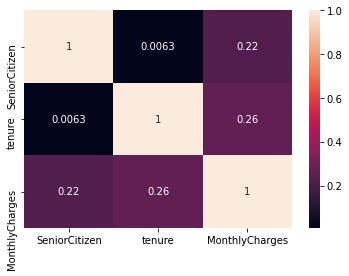

In [83]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In questo grafico di correlazione non vi è Churn così ho deciso di trasformarlo in booleano

In [84]:
train['Churn'] = train['Churn'].map(lambda x :1  if x =='Yes' else 0)
test['Churn'] = test['Churn'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

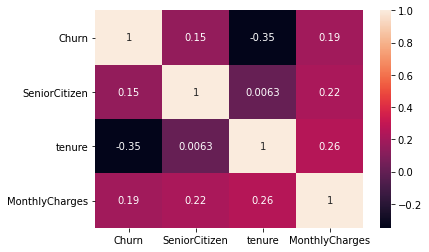

In [85]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In questa correlazione non vi è nessuna features che possiamo eliminare.

Inizio a vedere la correlazione e se si possono eliminare le features.

StreamingTV

In [86]:
train['StreamingTV'] = train['StreamingTV'].map(lambda x :1  if x =='Yes' else 0)
test['StreamingTV'] = test['StreamingTV'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

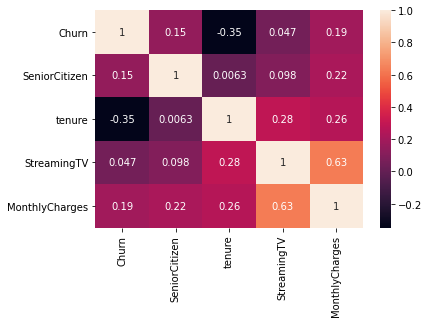

In [87]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: StreamingTv ha una correlazione vicina allo 0 quindi può essere droppata.

In [88]:
train.drop(['StreamingTV'], axis=1, inplace=True)
test.drop(['StreamingTV'], axis=1, inplace=True)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   int64  
 1   customerID        4507 non-null   object 
 2   gender            4507 non-null   object 
 3   SeniorCitizen     4507 non-null   int64  
 4   Partner           4507 non-null   object 
 5   Dependents        4507 non-null   object 
 6   tenure            4507 non-null   int64  
 7   PhoneService      4507 non-null   object 
 8   MultipleLines     4507 non-null   object 
 9   InternetService   4507 non-null   object 
 10  OnlineSecurity    4507 non-null   object 
 11  OnlineBackup      4507 non-null   object 
 12  DeviceProtection  4507 non-null   object 
 13  TechSupport       4507 non-null   object 
 14  StreamingMovies   4507 non-null   object 
 15  Contract          4507 non-null   object 
 16  PaperlessBilling  4507 non-null   object 


customerID

Considerazione: un ulteriore features che può essere tolto in quanto non influisce è il CustomerID

In [90]:
train.drop(['customerID'], axis=1, inplace=True)
test.drop(['customerID'], axis=1, inplace=True)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   int64  
 1   gender            4507 non-null   object 
 2   SeniorCitizen     4507 non-null   int64  
 3   Partner           4507 non-null   object 
 4   Dependents        4507 non-null   object 
 5   tenure            4507 non-null   int64  
 6   PhoneService      4507 non-null   object 
 7   MultipleLines     4507 non-null   object 
 8   InternetService   4507 non-null   object 
 9   OnlineSecurity    4507 non-null   object 
 10  OnlineBackup      4507 non-null   object 
 11  DeviceProtection  4507 non-null   object 
 12  TechSupport       4507 non-null   object 
 13  StreamingMovies   4507 non-null   object 
 14  Contract          4507 non-null   object 
 15  PaperlessBilling  4507 non-null   object 
 16  PaymentMethod     4507 non-null   object 


PhoneService

In [92]:
train['PhoneService'] = train['PhoneService'].map(lambda x :1  if x =='Yes' else 0)
test['PhoneService'] = test['PhoneService'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

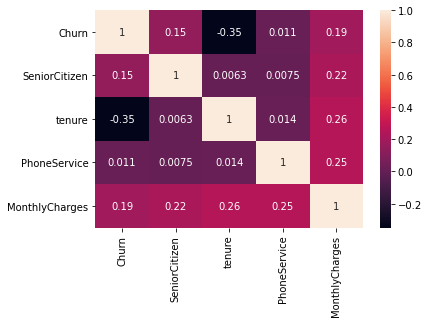

In [93]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: anche PhoneService è quasi vicina allo zero e quindi può essere eliminata.

In [94]:
train.drop(['PhoneService'], axis=1, inplace=True)
test.drop(['PhoneService'], axis=1, inplace=True)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   int64  
 1   gender            4507 non-null   object 
 2   SeniorCitizen     4507 non-null   int64  
 3   Partner           4507 non-null   object 
 4   Dependents        4507 non-null   object 
 5   tenure            4507 non-null   int64  
 6   MultipleLines     4507 non-null   object 
 7   InternetService   4507 non-null   object 
 8   OnlineSecurity    4507 non-null   object 
 9   OnlineBackup      4507 non-null   object 
 10  DeviceProtection  4507 non-null   object 
 11  TechSupport       4507 non-null   object 
 12  StreamingMovies   4507 non-null   object 
 13  Contract          4507 non-null   object 
 14  PaperlessBilling  4507 non-null   object 
 15  PaymentMethod     4507 non-null   object 
 16  MonthlyCharges    4507 non-null   float64


MultipleLines

In [96]:
train['MultipleLines'] = train['MultipleLines'].map(lambda x :1  if x =='Yes' else 0)
test['MultipleLines'] = test['MultipleLines'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

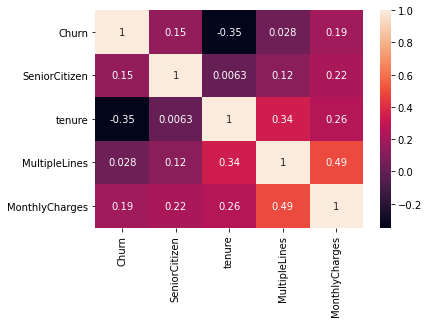

In [97]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: Anche MultipleLines è molto vicina allo zero e quindi possiamo eliminarla

In [98]:
train.drop(['MultipleLines'], axis=1, inplace=True)
test.drop(['MultipleLines'], axis=1, inplace=True)

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   int64  
 1   gender            4507 non-null   object 
 2   SeniorCitizen     4507 non-null   int64  
 3   Partner           4507 non-null   object 
 4   Dependents        4507 non-null   object 
 5   tenure            4507 non-null   int64  
 6   InternetService   4507 non-null   object 
 7   OnlineSecurity    4507 non-null   object 
 8   OnlineBackup      4507 non-null   object 
 9   DeviceProtection  4507 non-null   object 
 10  TechSupport       4507 non-null   object 
 11  StreamingMovies   4507 non-null   object 
 12  Contract          4507 non-null   object 
 13  PaperlessBilling  4507 non-null   object 
 14  PaymentMethod     4507 non-null   object 
 15  MonthlyCharges    4507 non-null   float64
 16  TotalCharges      4507 non-null   object 


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             1127 non-null   int64  
 1   gender            1127 non-null   object 
 2   SeniorCitizen     1127 non-null   int64  
 3   Partner           1127 non-null   object 
 4   Dependents        1127 non-null   object 
 5   tenure            1127 non-null   int64  
 6   InternetService   1127 non-null   object 
 7   OnlineSecurity    1127 non-null   object 
 8   OnlineBackup      1127 non-null   object 
 9   DeviceProtection  1127 non-null   object 
 10  TechSupport       1127 non-null   object 
 11  StreamingMovies   1127 non-null   object 
 12  Contract          1127 non-null   object 
 13  PaperlessBilling  1127 non-null   object 
 14  PaymentMethod     1127 non-null   object 
 15  MonthlyCharges    1127 non-null   float64
 16  TotalCharges      1127 non-null   object 


StreamingMovies

In [101]:
train['StreamingMovies'] = train['StreamingMovies'].map(lambda x :1  if x =='Yes' else 0)
test['StreamingMovies'] = test['StreamingMovies'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

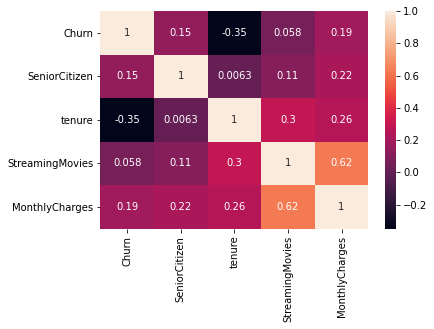

In [102]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: anche questo può essere eliminato

In [103]:
train.drop(['StreamingMovies'], axis=1, inplace=True)
test.drop(['StreamingMovies'], axis=1, inplace=True)

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   int64  
 1   gender            4507 non-null   object 
 2   SeniorCitizen     4507 non-null   int64  
 3   Partner           4507 non-null   object 
 4   Dependents        4507 non-null   object 
 5   tenure            4507 non-null   int64  
 6   InternetService   4507 non-null   object 
 7   OnlineSecurity    4507 non-null   object 
 8   OnlineBackup      4507 non-null   object 
 9   DeviceProtection  4507 non-null   object 
 10  TechSupport       4507 non-null   object 
 11  Contract          4507 non-null   object 
 12  PaperlessBilling  4507 non-null   object 
 13  PaymentMethod     4507 non-null   object 
 14  MonthlyCharges    4507 non-null   float64
 15  TotalCharges      4507 non-null   object 
dtypes: float64(1), int64(3), object(12)
memory

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             1127 non-null   int64  
 1   gender            1127 non-null   object 
 2   SeniorCitizen     1127 non-null   int64  
 3   Partner           1127 non-null   object 
 4   Dependents        1127 non-null   object 
 5   tenure            1127 non-null   int64  
 6   InternetService   1127 non-null   object 
 7   OnlineSecurity    1127 non-null   object 
 8   OnlineBackup      1127 non-null   object 
 9   DeviceProtection  1127 non-null   object 
 10  TechSupport       1127 non-null   object 
 11  Contract          1127 non-null   object 
 12  PaperlessBilling  1127 non-null   object 
 13  PaymentMethod     1127 non-null   object 
 14  MonthlyCharges    1127 non-null   float64
 15  TotalCharges      1127 non-null   object 
dtypes: float64(1), int64(3), object(12)
memory

Partner

In [106]:
train['Partner'] = train['Partner'].map(lambda x :1  if x =='Yes' else 0)
test['Partner'] = test['Partner'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

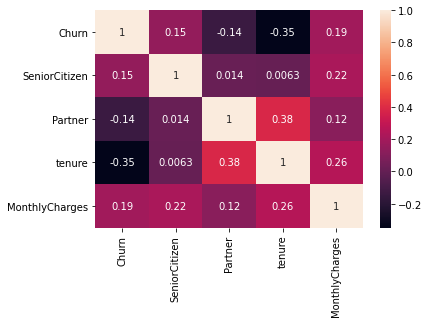

In [107]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: Partner ha una correlazione negativa e non vicina allo 0, quindi non può essere eliminato

Dependents

In [108]:
train['Dependents'] = train['Dependents'].map(lambda x :1  if x =='Yes' else 0)
test['Dependents'] = test['Dependents'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

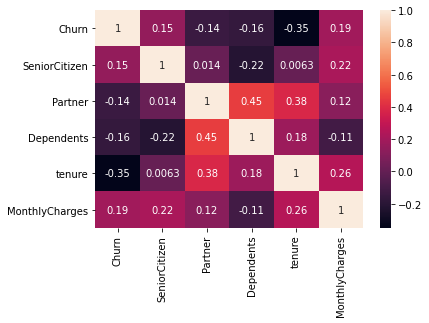

In [109]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: Dependets ha una correlazione negativa e non vicina allo 0, quindi non può essere eliminato

In [110]:
train.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Female,1,1,0,66,Fiber optic,No,Yes,Yes,No,One year,No,Credit card (automatic),104.60,6819.45
1,0,Male,0,1,0,35,DSL,No,Yes,No,Yes,One year,Yes,Electronic check,69.00,2441.7
2,1,Female,0,0,0,30,DSL,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),85.35,2530.4
3,1,Female,0,0,0,15,Fiber optic,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,105.10,1582.75
4,0,Male,1,1,0,10,Fiber optic,Yes,No,No,No,Month-to-month,No,Electronic check,75.30,720.45


OnlineSecurity

In [111]:
train['OnlineSecurity'] = train['OnlineSecurity'].map(lambda x :1  if x =='Yes' else 0)
test['OnlineSecurity'] = test['OnlineSecurity'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

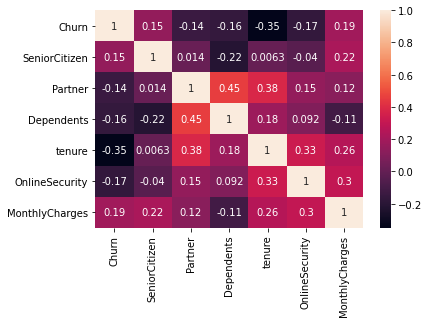

In [112]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: OnlineSecurity non è vicino allo 0 ed è negativa quindi non può essere eliminata

OnlineBackup

In [113]:
train['OnlineBackup'] = train['OnlineBackup'].map(lambda x :1  if x =='Yes' else 0)
test['OnlineBackup'] = test['OnlineBackup'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

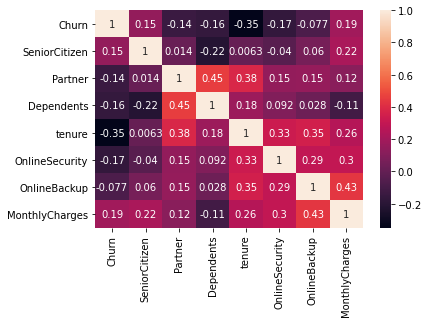

In [114]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: ha una correlazione molto bassa e vicina ancora allo 0

In [115]:
train.drop(['OnlineBackup'], axis=1, inplace=True)
test.drop(['OnlineBackup'], axis=1, inplace=True)

In [116]:
train.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Female,1,1,0,66,Fiber optic,0,Yes,No,One year,No,Credit card (automatic),104.60,6819.45
1,0,Male,0,1,0,35,DSL,0,No,Yes,One year,Yes,Electronic check,69.00,2441.7
2,1,Female,0,0,0,30,DSL,1,Yes,Yes,One year,No,Bank transfer (automatic),85.35,2530.4
3,1,Female,0,0,0,15,Fiber optic,1,Yes,Yes,Month-to-month,No,Electronic check,105.10,1582.75
4,0,Male,1,1,0,10,Fiber optic,1,No,No,Month-to-month,No,Electronic check,75.30,720.45


DeviceProtection

In [117]:
train['DeviceProtection'] = train['DeviceProtection'].map(lambda x :1  if x =='Yes' else 0)
test['DeviceProtection'] = test['DeviceProtection'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

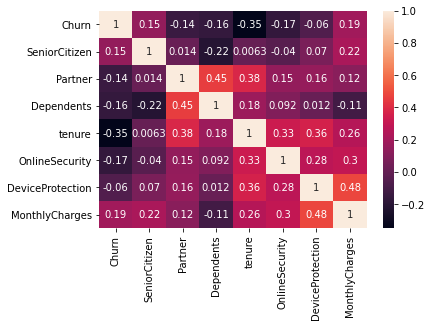

In [118]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: ha una correlazione molto bassa e vicina allo 0.

In [119]:
train.drop(['DeviceProtection'], axis=1, inplace=True)
test.drop(['DeviceProtection'], axis=1, inplace=True)

In [120]:
train.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Female,1,1,0,66,Fiber optic,0,No,One year,No,Credit card (automatic),104.60,6819.45
1,0,Male,0,1,0,35,DSL,0,Yes,One year,Yes,Electronic check,69.00,2441.7
2,1,Female,0,0,0,30,DSL,1,Yes,One year,No,Bank transfer (automatic),85.35,2530.4
3,1,Female,0,0,0,15,Fiber optic,1,Yes,Month-to-month,No,Electronic check,105.10,1582.75
4,0,Male,1,1,0,10,Fiber optic,1,No,Month-to-month,No,Electronic check,75.30,720.45


TechSupport

In [121]:
train['TechSupport'] = train['TechSupport'].map(lambda x :1  if x =='Yes' else 0)
test['TechSupport'] = test['TechSupport'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

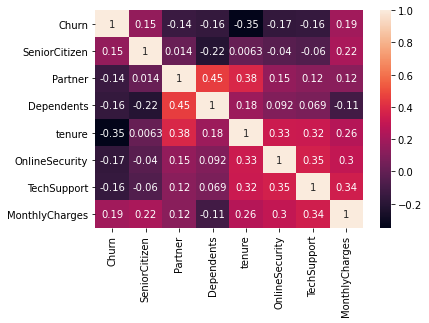

In [122]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: non deve essere eliminata in quanto non ha una correlazione vicino allo 0

PaperlessBilling

In [123]:
train['PaperlessBilling'] = train['PaperlessBilling'].map(lambda x :1  if x =='Yes' else 0)
test['PaperlessBilling'] = test['PaperlessBilling'].map(lambda x :1  if x =='Yes' else 0)

<AxesSubplot:>

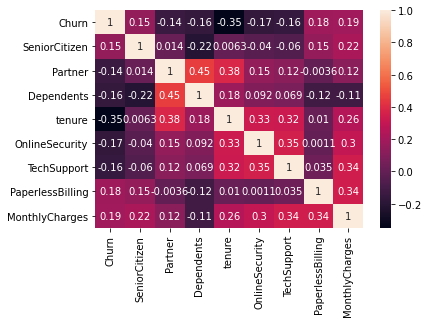

In [124]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Considerazione: ha una correlazione non vicina allo 0 quindi va lasciata

In [125]:
train.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Female,1,1,0,66,Fiber optic,0,0,One year,0,Credit card (automatic),104.60,6819.45
1,0,Male,0,1,0,35,DSL,0,1,One year,1,Electronic check,69.00,2441.7
2,1,Female,0,0,0,30,DSL,1,1,One year,0,Bank transfer (automatic),85.35,2530.4
3,1,Female,0,0,0,15,Fiber optic,1,1,Month-to-month,0,Electronic check,105.10,1582.75
4,0,Male,1,1,0,10,Fiber optic,1,0,Month-to-month,0,Electronic check,75.30,720.45


In [126]:
train.dtypes

Churn                 int64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
InternetService      object
OnlineSecurity        int64
TechSupport           int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

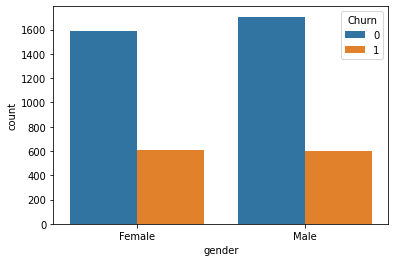

In [127]:
sns.countplot(x=train["gender"], hue=train["Churn"])

Considerazioni: da questo grafico si può capire che geneder non influisce su Churn quindi può essere eliminata.

In [128]:
train.drop(['gender'], axis=1, inplace=True)
test.drop(['gender'], axis=1, inplace=True)

Tenure

In [129]:
train.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,1,0,66,Fiber optic,0,0,One year,0,Credit card (automatic),104.60,6819.45
1,0,0,1,0,35,DSL,0,1,One year,1,Electronic check,69.00,2441.7
2,1,0,0,0,30,DSL,1,1,One year,0,Bank transfer (automatic),85.35,2530.4
3,1,0,0,0,15,Fiber optic,1,1,Month-to-month,0,Electronic check,105.10,1582.75
4,0,1,1,0,10,Fiber optic,1,0,Month-to-month,0,Electronic check,75.30,720.45


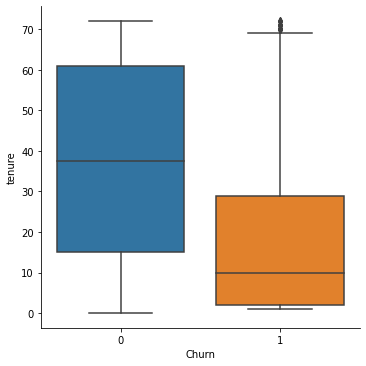

In [130]:
sns.catplot(x="Churn", y="tenure", data=train, kind="box")
#un basso tenure implica un churn negativo

MonthlyCharges

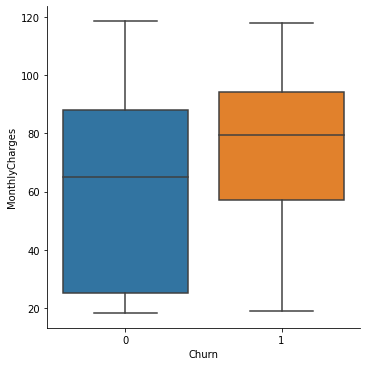

In [131]:
sns.catplot(x="Churn", y="MonthlyCharges", data=train, kind="box")


In [132]:
train.dtypes

Churn                 int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
InternetService      object
OnlineSecurity        int64
TechSupport           int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

# Label encoding per i restanti object

In [133]:
labelEncoder = LabelEncoder()

In [134]:
train['InternetService']=labelEncoder.fit_transform(train['InternetService'])
train['Contract']=labelEncoder.fit_transform(train['Contract'])
train['PaymentMethod']=labelEncoder.fit_transform(train['PaymentMethod'])
train['TotalCharges']=labelEncoder.fit_transform(train['TotalCharges'])

In [135]:
train.dtypes

Churn                 int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
InternetService       int32
OnlineSecurity        int64
TechSupport           int64
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
dtype: object

In [136]:
test['InternetService']=labelEncoder.fit_transform(test['InternetService'])
test['Contract']=labelEncoder.fit_transform(test['Contract'])
test['PaymentMethod']=labelEncoder.fit_transform(test['PaymentMethod'])
test['TotalCharges']=labelEncoder.fit_transform(test['TotalCharges'])

In [137]:
test.dtypes

Churn                 int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
InternetService       int32
OnlineSecurity        int64
TechSupport           int64
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
dtype: object

# Separated dataset from labels

In [138]:
features = train.columns.drop('Churn')
x_train = train[features]
y_train = train['Churn']

In [139]:
x_test = test[features]
y_test = test['Churn']

# Accuracy

Decision tree

In [140]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print(f'Accuracy of training set: {tree.score(x_train, y_train)*100}%')

Accuracy of training set: 99.80031062791214%


In [141]:
print(f'Accuracy of test set: {tree.score(x_test, y_test)*100}%')

Accuracy of test set: 68.67790594498669%


Random forest

RandomForest è un algoritmo che (a differenza del DecisionTree) genera molteplici alberi. 

In [144]:
model = RandomForestClassifier() 
model.fit(x_train, y_train)
print(f'Accuracy of training set: {model.score(x_train, y_train)*100}%')

Accuracy of training set: 99.80031062791214%


In [145]:
print(f'Accuracy of test set: {model.score(x_test, y_test)*100}%')

Accuracy of test set: 79.94676131322093%
